Bibliotheken

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mit der Analyse starten

In [4]:
df = pd.read_excel('.\data\Lagerbestand.xlsx')
df.head(10)

,Artikel,Bestand,Verbrauch_pro_Tag,Meldebestand,Lieferzeit_Tage
0,Sechskantschraube M8,700,45.0,700,7
1,Sechskantschraube M10,850,32.0,600,7
2,Unterlegscheibe M8,3000,110.0,1800,5
3,Unterlegscheibe M10,2200,90.0,1500,5
4,Mutter M8,2600,95.0,1600,5
5,Mutter M10,1800,70.0,1200,5
6,Holzschraube 4x40,1400,60.0,900,7
7,Holzschraube 5x60,900,38.0,650,7
8,Spanplattenschraube 4x50,1100,42.0,750,7
9,Spanplattenschraube 5x70,700,28.0,550,7


Tage bis Leer Berechnung

In [5]:
df['Resttage'] = round(df['Bestand'] / df['Verbrauch_pro_Tag'])
df.head(10)

,Artikel,Bestand,Verbrauch_pro_Tag,Meldebestand,Lieferzeit_Tage,Resttage
0,Sechskantschraube M8,700,45.0,700,7,16.0
1,Sechskantschraube M10,850,32.0,600,7,27.0
2,Unterlegscheibe M8,3000,110.0,1800,5,27.0
3,Unterlegscheibe M10,2200,90.0,1500,5,24.0
4,Mutter M8,2600,95.0,1600,5,27.0
5,Mutter M10,1800,70.0,1200,5,26.0
6,Holzschraube 4x40,1400,60.0,900,7,23.0
7,Holzschraube 5x60,900,38.0,650,7,24.0
8,Spanplattenschraube 4x50,1100,42.0,750,7,26.0
9,Spanplattenschraube 5x70,700,28.0,550,7,25.0


Nachbestellungs Bestimmung

In [6]:
df['Sicherheitszeit'] = df['Lieferzeit_Tage'] + 2
df["Status"] = "ok"
df.loc[df["Resttage"] <= df["Lieferzeit_Tage"], "Status"] = "kritisch"
df.loc[
    (df["Status"] == "ok") & (
        (df["Resttage"] <= df["Sicherheitszeit"]) |
        (df["Bestand"] <= df["Meldebestand"])
     ),
    "Status"
] = "nachbestellen"

df.sort_values('Status').head(15)

,Artikel,Bestand,Verbrauch_pro_Tag,Meldebestand,Lieferzeit_Tage,Resttage,Sicherheitszeit,Status
14,Keilriemen A32,90,45.0,45,14,2.0,16,kritisch
23,Industriefilter Typ B,45,45.0,30,14,1.0,16,kritisch
22,Industriefilter Typ A,60,45.0,35,14,1.0,16,kritisch
18,Hydraulikschlauch 1m,130,45.0,70,10,3.0,12,kritisch
17,Hydrauliköl 10L,95,45.0,55,7,2.0,9,kritisch
16,Schmierfett 400g,260,45.0,140,7,6.0,9,kritisch
15,Keilriemen A40,70,45.0,40,14,2.0,16,kritisch
13,Kugellager 6205,150,45.0,85,14,3.0,16,kritisch
12,Kugellager 6204,180,45.0,90,14,4.0,16,kritisch
11,Dichtungsring 15mm,350,45.0,230,10,8.0,12,kritisch


Visualisierungen


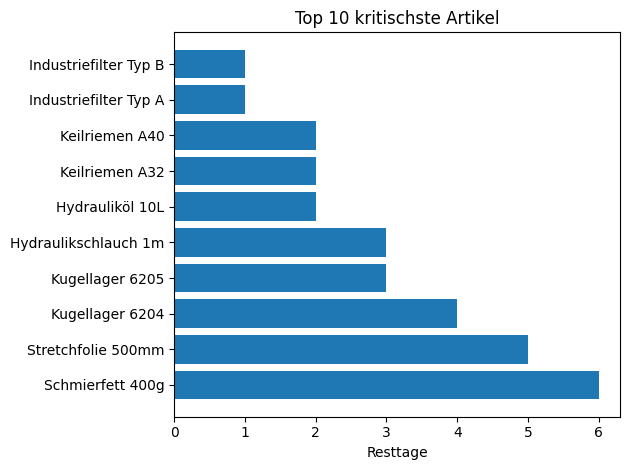

In [7]:
top10 = df.sort_values("Resttage").head(10)
plt.figure()
plt.barh(top10["Artikel"], top10["Resttage"])
plt.gca().invert_yaxis()
plt.xlabel("Resttage")
plt.title("Top 10 kritischste Artikel")
plt.tight_layout()
plt.show()

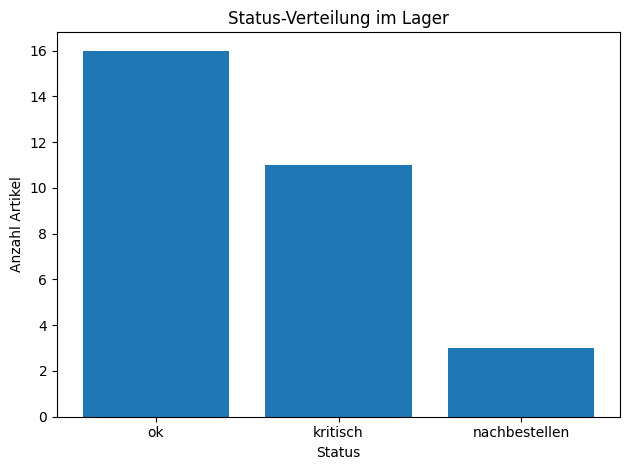

In [8]:
status_counts = df["Status"].value_counts()

plt.figure()
plt.bar(status_counts.index, status_counts.values)
plt.xlabel("Status")
plt.ylabel("Anzahl Artikel")
plt.title("Status-Verteilung im Lager")
plt.tight_layout()
plt.show()

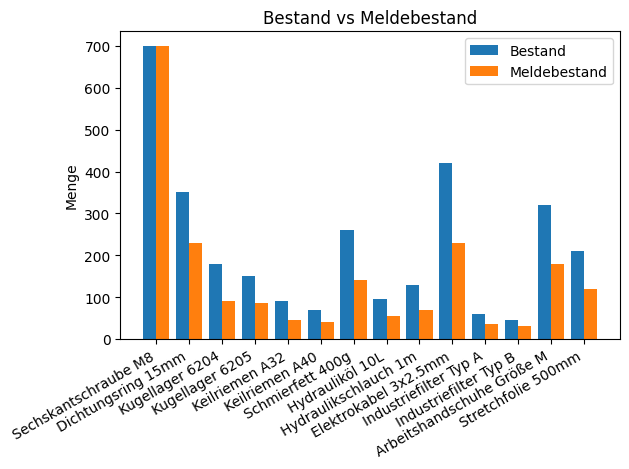

In [9]:
kritisch = df[df["Status"].isin(["kritisch", "nachbestellen"])]

plt.figure()
x = np.arange(len(kritisch))
plt.bar(x - 0.2, kritisch["Bestand"], width=0.4, label="Bestand")
plt.bar(x + 0.2, kritisch["Meldebestand"], width=0.4, label="Meldebestand")
plt.xticks(x, kritisch["Artikel"], rotation=30, ha="right")
plt.ylabel("Menge")
plt.title("Bestand vs Meldebestand")
plt.legend()
plt.tight_layout()
plt.show()